<a href="https://colab.research.google.com/github/luckguy/SS2022/blob/main/SS02_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=blue>離散時間複數弦波訊號</font>


### Complex Exponential Signal

The discrete complex exponential signal is defined by the [complex exponential function](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x[n] = e^{(\beta + j \Omega_0) \, n} = z^n
\end{equation}

where $z = e^{\beta + j \Omega_0}$ denotes the complex frequency $z \in \mathbb{C}$ with $\Sigma, \Omega \in \mathbb{R}$. The discrete complex exponential signal can be related to the [continuous complex exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $x(t) = e^{(\sigma + j \omega) t}$ by sampling

\begin{equation}
x[k] = x(k T) = e^{(\sigma + j \omega) k T} = e^{( \sigma T + j \omega T ) k}
\end{equation}

where $T$ denotes the sampling interval. Comparison to above definition of the discrete signal reveals that $\Sigma = \sigma T$ and $\Omega = \omega T$. Due to this relation, the latter is termed as *normalized frequency* $\Omega$. Using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula), the definition of the complex exponential signal can be reformulated as

\begin{equation}
x[k] = e^{\Sigma k} \cos[\Omega k] + j e^{\Sigma k} \sin[\Omega k]
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted discrete cosine/sine with normalized frequency $\Omega$. The normalized frequency $\Omega$ is ambiguous due to the periodicity of the cosine/sine function for discrete $k$. For instance

\begin{equation}
\cos[\Omega k] = \cos[(\Omega + n \cdot 2 \pi) \cdot k]
\end{equation}

with $n \in \mathbb{Z}$. It can be concluded that the normalized frequency $\Omega$ is unique for $-\pi < \Omega < \pi$. This also becomes evident when considering the sampling of a continuous exponential signal, as shown above. For [critical sampling](../sampling/ideal.ipynb#Sampling-Theorem-for-Low-Pass-Signals) the sampling frequency $\omega_\text{s} = 2 \cdot \omega$. From $T = \frac{2 \pi}{\omega_\text{s}}$ follows $\Omega = \omega T = \pi$. It can be concluded that the normalized frequency $\Omega = \pm \pi$ represents the highest/lowest normalized frequency a sampled signal can represent.

The complex exponential function is only periodic with respect to the discrete index $k$, if

\begin{equation}
x[k] = x[k + n \cdot N_\text{p}]
\end{equation}

holds for $n \in \mathbb{Z}$ and $N_\text{p} \in \mathbb{N}$. The periodicity of the complex exponential function is given as

\begin{equation}
N_\text{p} = \frac{2 \pi}{\Omega}
\end{equation}

It follows from the requirement $N_\text{p} \in \mathbb{N}$ for a periodic sequence, that not all normalized frequencies $\Omega$ result in a periodic discrete complex exponential signal. Only $\Omega = \frac{2 \pi}{N_\text{p}}$ with $N_\text{p} \in \mathbb{N}$ is periodic with period $N_\text{p}$. Sampling of a continuous complex exponential signal may result in an aperiodic discrete complex exponential signal.

The complex exponential signal can be expressed in terms of its magnitude and phase

\begin{equation}
x[k] = z^k = |z|^k \cdot e^{j \varphi(z) k}
\end{equation}

where by comparison with its definition $|z| = |e^\Sigma|$ and $\varphi(z) = \Omega$. This finding allows an interpretation of the complex frequency $z$. Its phase $\varphi(z)$ is equal to the normalized frequency $\Omega$ of its harmonic part $e^{j \Omega k}$. This is weighted by the magnitude $|z|^k$. With increasing index $k >0$, the magnitude of the complex exponential signal is

* exponentially decaying for $|z| < 1$ ($\Sigma < 0$)
* constantly one for $|z| = 1$ ($\Sigma = 0$)
* exponentially growing for $|z| > 1$ ($\Sigma > 0$).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def exponential_signal(k,*args):
    if (len(args)==1):  # z^n
        z=args[0]
        return z**k;
    else:   # z^n=(sigma+jomga)^n
        Sigma=args[0]
        Omega=args[1]
        return(np.exp((Sigma+1j*Omega)*k))

def plot_real_signal(k, x):
    plt.figure(figsize=(10,4))
    plt.stem(k,np.real(x),use_line_collection=True)
    plt.xlabel('$n$')
    plt.ylabel(r'$x[n]$')

def plot_complex_signal(k, x):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.stem(k, np.real(x), use_line_collection=True)
    plt.xlabel('$n$')
    plt.ylabel(r'$\Re \{ x[n] \}$')

    plt.subplot(122)
    plt.stem(k, np.imag(x), use_line_collection=True)
    plt.xlabel('$n$')
    plt.ylabel(r'$\Im \{ x[n] \}$')
    plt.tight_layout()

## Case 1: $z$ 為實數


> $z>1$

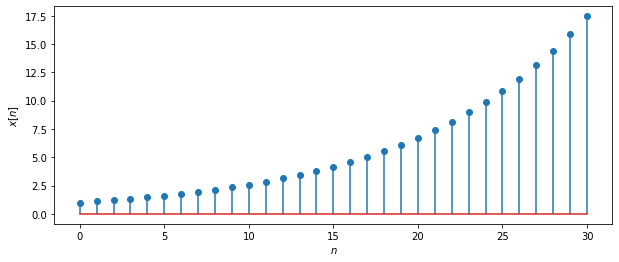

In [ ]:
k = np.arange(31)
z=1.1
x = exponential_signal(k, z)
plot_real_signal(k,x)




> $0<z<1$



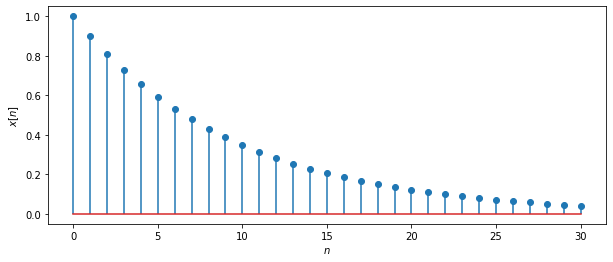

In [ ]:
k = np.arange(31)
z=0.9
x = exponential_signal_z(k, z)
plot_real_signal(k,x)


## Case 2: $z$ 為純虛數。$z=e^{j\Omega_0}$

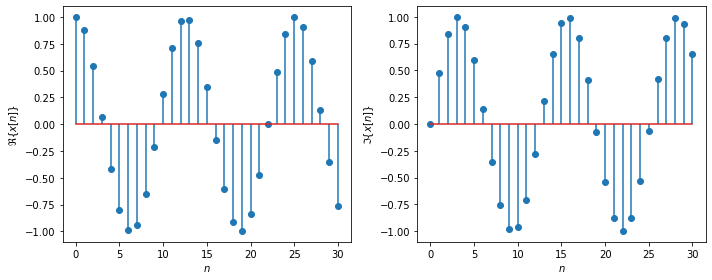

In [35]:
k = np.arange(31)
x = exponential_signal(k, 0., 0.5)
plot_complex_signal(k,x)


## Case 3: